<a href="https://colab.research.google.com/github/barbarabraune/graficos_speckle/blob/main/tres_graf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
cd /content/drive/MyDrive/graficos_speckle/


/content/drive/MyDrive/graficos_speckle


In [ ]:
df = pd.read_excel(r'/content/drive/MyDrive/graficos_speckle/100_certo.xlsx', usecols="G,H,CE")


In [ ]:
print(df.head(3))

  7. STANDARD DEVIATION (σ) for D for Dʙ 8. ★D (D with highest r²) for Dʙ  \
0                                 0,0007                           2,8781   
1                                 0,0006                           2,8775   
2                                 0,0012                           2,8747   

  83. LACUNARITY for Image (Ｌ) = ∑Λ₍ɢ₎/Ǥɴ ∀ ɢ∈Ǥ  
0                                        0,0159  
1                                        0,0162  
2                                        0,0153  


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [ ]:
frames = []
for i in range(2517):
    frames.append(i)

In [ ]:
db = list(df['8. ★D (D with highest r²) for Dʙ'])
sigma = list(df['7. STANDARD DEVIATION (σ) for D for Dʙ'])
lac = list(df['83. LACUNARITY for Image (Ｌ) = ∑Λ₍ɢ₎/Ǥɴ ∀ ɢ∈Ǥ'])

In [ ]:
print(db)
print(sigma)
print(lac)

['2,8781', '2,8775', '2,8747', '2,8715', '2,8797', '2,8781', '2,8781', '2,8759', '2,8777', '2,8736', '2,8745', '2,8769', '2,8759', '2,8787', '2,8777', '2,8757', '2,8719', '2,8802', '2,8759', '2,8756', '2,8797', '2,8783', '2,8764', '2,8736', '2,8757', '2,8792', '2,8764', '2,8765', '2,8794', '2,8808', '2,8766', '2,8809', '2,8876', '2,8822', '2,8829', '2,8815', '2,8804', '2,8785', '2,8817', '2,8804', '2,8821', '2,8844', '2,8808', '2,8832', '2,8854', '2,8785', '2,8821', '2,8801', '2,8829', '2,8782', '2,8769', '2,8811', '2,8826', '2,8793', '2,8806', '2,8824', '2,878', '2,8777', '2,8774', '2,8744', '2,8743', '2,8802', '2,8786', '2,8792', '2,8758', '2,8782', '2,877', '2,8734', '2,8769', '2,8765', '2,8742', '2,8736', '2,8723', '2,8735', '2,872', '2,8743', '2,8765', '2,874', '2,8722', '2,8782', '2,8754', '2,8717', '2,8802', '2,8781', '2,8771', '2,874', '2,8755', '2,8736', '2,8712', '2,8699', '2,8734', '2,8719', '2,873', '2,8714', '2,876', '2,8753', '2,8755', '2,8753', '2,8798', '2,8753', '2,876

In [ ]:
print(lac[0::10])

['0,0159', '0,0165', '0,0151', '0,0151', '0,0157', '0,0153', '0,0161', '0,0168', '0,0163', '0,0162', '0,0159', '0,0166', '0,0179', '0,0165', '0,0182', '0,0187', '0,0182', '0,0168', '0,0187', '0,0184', '0,0212', '0,0198', '0,0162', '0,0188', '0,0213', '0,0221', '0,0219', '0,0234', '0,0246', '0,027', '0,0281', '0,0259', '0,0256', '0,0268', '0,0303', '0,0232', '0,0247', '0,0244', '0,0258', '0,0251', '0,0257', '0,0251', '0,027', '0,0263', '0,028', '0,0244', '0,0249', '0,0254', '0,0259', '0,0279', '0,0248', '0,0276', '0,0265', '0,0261', '0,0238', '0,0279', '0,0261', '0,0292', '0,0281', '0,0293', '0,0266', '0,0238', '0,0298', '0,0289', '0,0279', '0,0283', '0,0272', '0,0279', '0,0257', '0,0275', '0,0282', '0,0269', '0,0303', '0,0264', '0,027', '0,0274', '0,0277', '0,0263', '0,0264', '0,0245', '0,0247', '0,026', '0,025', '0,0253', '0,0271', '0,0266', '0,0241', '0,0259', '0,0281', '0,0238', '0,0282', '0,0237', '0,0212', '0,0234', '0,0243', '0,0243', '0,0249', '0,0215', '0,0229', '0,024', '0,022

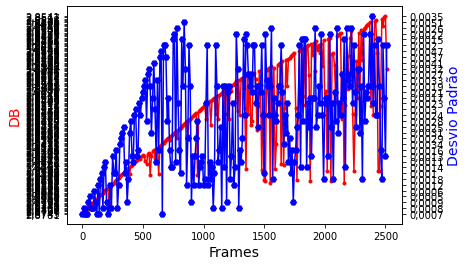

In [ ]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(frames[0::10],
        db[0::10],
        color="red", 
        marker=".")
# set x-axis label
ax.set_xlabel("Frames", fontsize = 14)
# set y-axis label
ax.set_ylabel("DB",
              color="red",
              fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(frames[0::10], sigma[0::10],color="blue",marker="H")
ax2.set_ylabel("Desvio Padrão",color="blue",fontsize=14)
plt.show()
# save the plot as a file
fig.savefig('tentando.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

In [ ]:
import plotly.express as px

<Figure size 3200x2400 with 0 Axes>

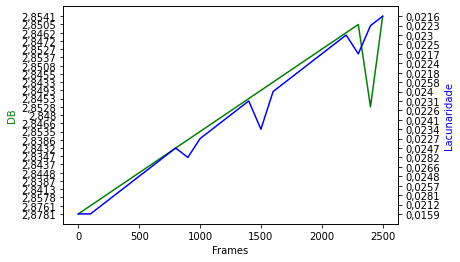

In [ ]:
figure(figsize=(8, 6), dpi=400)
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(frames[0::100], db[0::100], 'g-')
ax2.plot(frames[0::100], lac[0::100], 'b-')

ax1.set_xlabel('Frames')
ax1.set_ylabel('DB', color='g')
ax2.set_ylabel('Lacunaridade', color='b')

plt.show()

<Figure size 1600x1600 with 0 Axes>

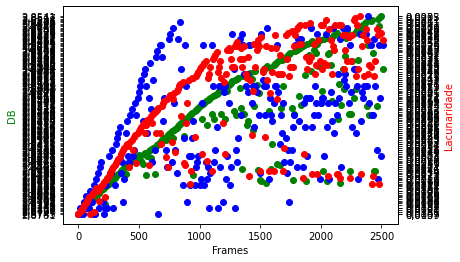

In [ ]:
figure(figsize=(20, 20), dpi=80)
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax1.scatter(x=frames[0::10], y=db[0::10], c='g')
ax2.scatter(x=frames[0::10], y=sigma[0::10], c='b')
ax3.scatter(x=frames[0::10], y=lac[0::10], c='r')

ax1.set_xlabel('Frames')
ax1.set_ylabel('DB', color='g')
ax3.set_ylabel('Lacunaridade', color='r')

plt.show()

fig.savefig('tentando.jpg',
            format='jpeg',
            dpi=80)